In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetic_readmission_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.isna().any().any() #to find any nan values

False

In [7]:
for col in df.columns: #loop though the columns to check for unit values in each column
    print(col, df[col].value_counts())

encounter_id 96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
patient_nbr 88785891   

acarbose No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64
miglitol No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64
troglitazone No        101763
Steady         3
Name: troglitazone, dtype: int64
tolazamide No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64
examide No    101766
Name: examide, dtype: int64
citoglipton No    101766
Name: citoglipton, dtype: int64
insulin No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64
glyburide-metformin No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64
glipizide-metformin No        101753
Steady        13
Name: glipizide-metformin, dtype: int64
glimepiride-pioglitazone No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64
metformin-rosiglitazone No        101764
Steady         2
Name: metformin-rosiglita

In [8]:
df['weight'].value_counts() #how many unique values in weight column

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [9]:
percent_of_nonValue_in_weight = 98569/len(df['weight']) * 100
percent_of_nonValue_in_weight

96.85847925633315

In [10]:
df['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [11]:
percent_of_nonValue_in_payer_code = 40256/len(df['payer_code']) *100
percent_of_nonValue_in_payer_code

39.5574160328597

In [12]:
df['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Lengt

In [13]:
df['medical_specialty'].value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

In [14]:
percent_of_nonValue_in_medical_specialty = 49949/len(df['medical_specialty']) *100
percent_of_nonValue_in_medical_specialty

49.08220820313268

In [15]:
df.drop(['weight', 'payer_code', 'patient_nbr', 'medical_specialty'], axis = 1, inplace = True)
df.head(10) 
#We decided to drop cols weights, payer_code, medical_specialty due to insufficient data ( 96.86%,39.56%, and 49.10% missing values respectively)
# We drop col patient_nbr because in the first run we came up with 2273 with non_values, subsequences run came up with non_missing values
# and because it is irrelevant to the outcome

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,Caucasian,Male,[60-70),3,1,2,4,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,Caucasian,Male,[70-80),1,1,7,5,73,0,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,Caucasian,Female,[80-90),2,1,4,13,68,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,Caucasian,Female,[90-100),3,3,4,12,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
# for some columns that contain non-values(? ), categorical values and we decided to keep it. We will replace them with
# most popular group
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [17]:
#Replace (?) in 'race' with 'Caucasian' using replace method
df.replace(to_replace = ['?'],
          value = 'Caucasian', inplace = True)

In [18]:
# run value_counts again to double check
df['race'].value_counts()

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [19]:
df['gender'].value_counts() # since the unknown/invalid is only 3, we can replace it without harm to data

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [20]:
df['gender'].replace(to_replace = ['Unknown/Invalid'],
          value = 'Male', inplace = True)

In [21]:
#call df.head()to see how our df looks like after cleaning
df.head(10)

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,Caucasian,Male,[60-70),3,1,2,4,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,Caucasian,Male,[70-80),1,1,7,5,73,0,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,Caucasian,Female,[80-90),2,1,4,13,68,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,Caucasian,Female,[90-100),3,3,4,12,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [22]:
df['examide'].value_counts()

No    101766
Name: examide, dtype: int64

In [23]:
df.groupby('race').agg({'time_in_hospital': ['mean','max','min']}).head()
# the results below show that race doesn't affect time patients staying in the hospital

time_in_hospital        
                            mean max min
race                                    
AfricanAmerican         4.507860  14   1
Asian                   3.995320  14   1
Caucasian               4.382930  14   1
Hispanic                4.059892  14   1
Other                   4.273572  14   1

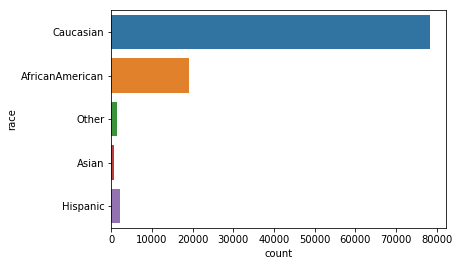

In [24]:
sns.countplot(y='race', data =df);

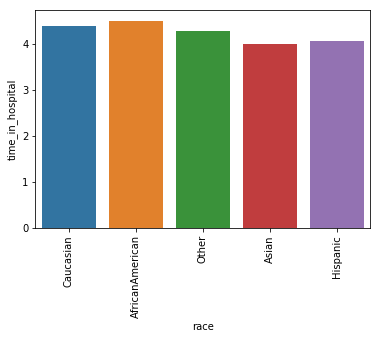

In [25]:
ax = sns.barplot(x='race', y = 'time_in_hospital', data = df, estimator = np.mean, ci = None)
ax.tick_params(axis ='x', rotation = 90);

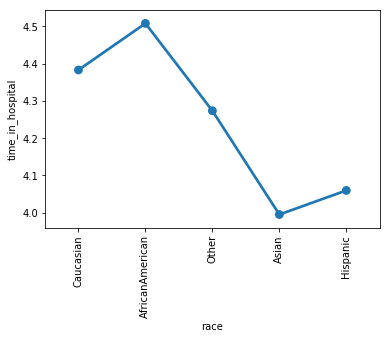

In [26]:
ax = sns.pointplot(x='race', y = 'time_in_hospital', data = df, estimator = np.mean, ci = None)
ax.tick_params(axis ='x', rotation = 90);

In [27]:
df.groupby('gender').agg({'time_in_hospital': ['mean','max','min']}).head()

time_in_hospital        
                   mean max min
gender                         
Female         4.478797  14   1
Male           4.299715  14   1

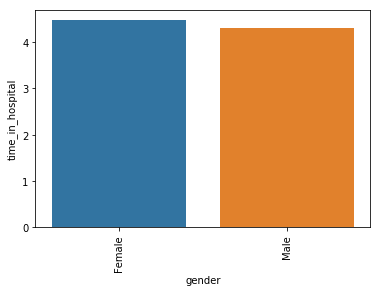

In [28]:
ax = sns.barplot(x='gender', y = 'time_in_hospital', data = df, estimator = np.mean, ci = None)
ax.tick_params(axis ='x', rotation = 90);

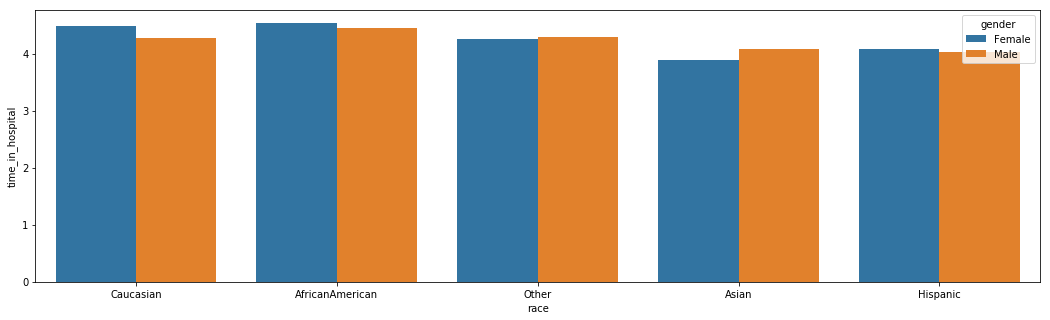

In [29]:
 fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='race', y='time_in_hospital', data=df, hue='gender',
estimator=np.mean, ci=None, ax=ax);

In [30]:
df['readmitted'].value_counts() # if no and >30 days are considered 'not being readmitted'
                                # and <30 days considered being readmitted
                                

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [31]:
percent_of_readmitted = 11357/(54864 + 35545+11357) *100
percent_of_readmitted           #only 12.56% was readmitted

11.159915885462727

In [32]:
percent_of_non_reamitted = 100 - percent_of_readmitted
percent_of_non_reamitted 

88.84008411453728

In [33]:
df['readmitted'].replace(to_replace = ['NO'],
          value = '0', inplace = True)


In [34]:
df['readmitted'].replace(to_replace = ['>30'],
          value = '0', inplace = True)

In [35]:
df['readmitted'].replace(to_replace = ['<30'],
          value = '1', inplace = True)

In [36]:
df['readmitted']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        1
12        1
13        0
14        0
15        0
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
101736    0
101737    0
101738    0
101739    0
101740    0
101741    0
101742    0
101743    0
101744    0
101745    0
101746    1
101747    0
101748    0
101749    0
101750    1
101751    0
101752    0
101753    0
101754    0
101755    0
101756    0
101757    0
101758    0
101759    0
101760    0
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: object

In [37]:
df['readmitted'].dtypes


dtype('O')

In [38]:
df.readmitted = df.readmitted.astype(int)

In [39]:
df.groupby('race').agg({'readmitted': 'mean'})

,readmitted
race,
AfricanAmerican,0.112181
Asian,0.101404
Caucasian,0.112030
Hispanic,0.104075
Other,0.096282


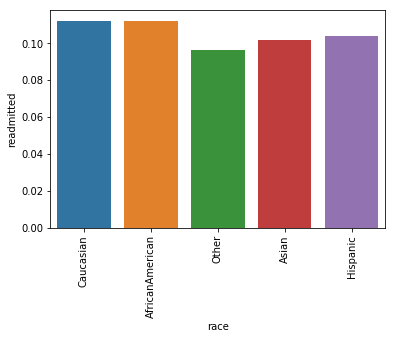

In [40]:
ax = sns.barplot(x='race', y = 'readmitted', data = df, estimator = np.mean, ci = None)
ax.tick_params(axis ='x', rotation = 90);

In [41]:
df['readmitted?'] = df['readmitted'].map(lambda x: 'yes' if x =='<30' else ('no' if x'>30' or  x =='NO'))
df.head(20)

SyntaxError: invalid syntax (<ipython-input-41-895cbdbff051>, line 1)

In [ ]:
df.groupby(['race', 'readmitted?'])['readmitted'].count()

In [ ]:
df.groupby(['age','readmitted?']).count()

In [ ]:
df['age'].unique()

In [ ]:
df['gender']= df['gender'].drop('Unknown/Invalid')